In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data

df = pd.read_csv('../data/car_price.csv')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


# I. Dataset presentation

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)
df

In [3]:
# Categorical variables

cat_columns = [
    'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
    'fuelsystem'
]
print('No. of categorical columns are:', len(cat_columns))

No. of categorical columns are: 10


In [4]:
# Numerical columns

num_columns = []
for col in df.columns:
    if col not in cat_columns:
        num_columns.append(col)
print('No. of numerical/float columns are:', len(num_columns))

No. of numerical/float columns are: 16


# II. Exploring Features
   ## II.1 Categorical

In [ ]:
for col_to_explore in cat_columns:

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    x = df[col_to_explore].value_counts().index
    y = df[col_to_explore].value_counts().values.tolist()

    data = df.groupby(col_to_explore).size()
    sns.set(style="dark", color_codes=True)
    pal = sns.color_palette("magma", len(data))
    rank = data.argsort().argsort()
    sns.barplot(x=x, y=y, palette=np.array(pal[::-1])[rank], ax=ax[0])

    for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()),
                       (p.get_x() + 0.3, p.get_height()),
                       ha='center',
                       va='bottom',
                       color='black')

    ax[0].set_xlabel('Types of ' + col_to_explore,
                     weight='semibold',
                     fontname='monospace')
    _, _, autotexts = ax[1].pie(
        y,
        labels=x,
        colors=pal,
        autopct='%1.1f%%',
        explode=[0.03 for i in df[col_to_explore].value_counts().index])

    for autotext in autotexts:
        autotext.set_color('white')

    plt.legend(bbox_to_anchor=(1, 1))
    plt.suptitle('Types of ' + col_to_explore, weight='bold')
    plt.show()

In [ ]:
sns.set_theme(rc={
    'figure.dpi': 250,
    'axes.labelsize': 7,
    'axes.facecolor': 'lightgrey',
    'grid.color': 'white',
    'figure.facecolor': 'white'
},
              font_scale=0.55)

fig, ax = plt.subplots(5, 2, figsize=(6.5, 8))
col_to_display = list(enumerate(list(zip(cat_columns, ax.flatten()))))

for indx, (column, axes) in col_to_display:

    sns.countplot(ax=axes,
                  x=df[column],
                  hue=df['doornumber'],
                  palette='magma',
                  alpha=0.8)

else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]

axes_legend = ax.flatten()
axes_legend[1].legend(title='doornumber', loc='upper right')
axes_legend[2].legend(title='doornumber', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(6.5, 8))
col_to_display = list(enumerate(list(zip(cat_columns, ax.flatten()))))

for indx, (column, axes) in col_to_display:
    sns.countplot(ax=axes,
                  x=df[column],
                  hue=df['fueltype'],
                  palette='magma',
                  alpha=0.8)

else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]

axes_legend = ax.flatten()
axes_legend[1].legend(title='fueltype', loc='upper right')
axes_legend[2].legend(title='fueltype', loc='upper right')


plt.tight_layout()
plt.show()

# II. Exploring Features
   ## II.2 Numerical

In [ ]:
fig, ax = plt.subplots(14, 1, figsize=(7, 30))
col_to_display = list(enumerate(list(zip(num_columns, ax.flatten()))))

for indx, (column, axes) in col_to_display:
    sns.scatterplot(ax=axes,
                    y=df[column].index,
                    x=df[column],
                    hue=df['doornumber'],
                    palette='magma',
                    alpha=0.8)

else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(14, 1, figsize=(5, 20))
col_to_display = list(enumerate(list(zip(num_columns, ax.flatten()))))

for indx, (column, axes) in col_to_display:
    sns.histplot(ax=axes,
                 x=df[column],
                 hue=df['doornumber'],
                 palette='magma',
                 alpha=0.8,
                 multiple='stack')

    legend = axes.get_legend()  # sns.hisplot has some issues with legend
    handles = legend.legendHandles
    legend.remove()
    axes.legend(handles, ['0', '1'], title='Survived', loc='upper right')
    Quantiles = np.quantile(df[column], [0, 0.25, 0.50, 0.75, 1])

    for q in Quantiles:
        axes.axvline(x=q, linewidth=0.5, color='r')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(6.5, 10))
col_to_display = list(enumerate(list(zip(cat_columns, ax.flatten()))))

for indx, (column, axes) in col_to_display:

    sns.violinplot(ax=axes,
                   x=df[column],
                   y=df['price'],
                   scale='width',
                   linewidth=0.5,
                   palette='magma',
                   inner=None)

    plt.setp(axes.collections, alpha=0.3)

    sns.stripplot(ax=axes,
                  x=df[column],
                  y=df['price'],
                  palette='magma',
                  alpha=0.9,
                  s=1.5,
                  jitter=0.07)
    sns.pointplot(ax=axes,
                  x=df[column],
                  y=df['price'],
                  color='#ff5736',
                  scale=0.25,
                  estimator=np.mean,
                  ci='sd',
                  errwidth=0.5,
                  capsize=0.15,
                  join=True)

    plt.setp(axes.lines, zorder=100)
    plt.setp(axes.collections, zorder=100)

else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]

plt.tight_layout()
plt.show()

In [ ]:
# Facet along the columns to show a categorical variable using "col" parameter
plt.figure(figsize=(11, 5))
sns.catplot(x="symboling",
            y="price",
            hue="fueltype",
            col="doornumber",
            kind="boxen",
            palette="Set2",
            height=8,
            aspect=1,
            data=df)
plt.show()

In [ ]:
df1 = df[df['drivewheel'].isin(['rwd', 'fwd', '4wd'])]
df1.head()

In [ ]:
# Plot a subset of variables
g = sns.PairGrid(df1,
                 hue='drivewheel',
                 vars=["carlength", "carwidth", "carheight"],
                 height=5,
                 aspect=1)
g = g.map_offdiag(plt.scatter, edgecolor="w", s=130)
g = g.map_diag(plt.hist, edgecolor='w', linewidth=2)
g = g.add_legend()
g.fig.set_size_inches(11, 8)

plt.show()

In [ ]:
# Plot a subset of variables
g = sns.PairGrid(df1,
                 hue='drivewheel',
                 vars=["horsepower", "peakrpm", "price"],
                 height=5,
                 aspect=1)
g = g.map_offdiag(plt.scatter, edgecolor="w", s=130)
g = g.map_diag(plt.hist, edgecolor='w', linewidth=2)
g = g.add_legend()
g.fig.set_size_inches(9, 7)

plt.show()

In [ ]:
corr_mat = df.corr().round(2)
f, ax = plt.subplots(figsize=(12, 7))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
mask = mask[1:, :-1]
corr = corr_mat.iloc[1:, :-1].copy()
sns.heatmap(corr,
            mask=mask,
            vmin=-0.3,
            vmax=0.3,
            center=0,
            cmap='RdPu_r',
            square=False,
            lw=2,
            annot=True,
            cbar=False)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Shifted Linear Correlation Matrix')

# III. Data preparation for regression
## III.1 # Data Preprocessing

In [5]:
from sklearn import preprocessing

def LABEL_ENCODING(c1):
    label_encoder = preprocessing.LabelEncoder()
    df[c1] = label_encoder.fit_transform(df[c1])
    df[c1].unique() 

print('dataset before encoding')
display(df[cat_columns].head(3))

LABEL_ENCODING("fueltype")
LABEL_ENCODING("aspiration")
LABEL_ENCODING("doornumber")
LABEL_ENCODING("carbody")
LABEL_ENCODING("drivewheel")
LABEL_ENCODING("enginelocation")
LABEL_ENCODING("enginetype")
LABEL_ENCODING("cylindernumber")
LABEL_ENCODING("fuelsystem")

print('dataset after encoding')
display(df[cat_columns].head(3))

dataset before encoding


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


dataset after encoding


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5


## III.2 Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
scaler.fit(df.drop(['price', 'CarName'], axis=1))
scaled_features = scaler.transform(df.drop(['price', 'CarName'], axis=1))

In [12]:
X = scaled_features
Y = df['price']
X = pd.DataFrame(data=X, columns=df.drop(columns=['price', 'CarName']).columns)

In [13]:
X.corr()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,1.000000,-0.151621,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,...,-0.040912,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255
symboling,-0.151621,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,0.197762,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
fueltype,-0.125568,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,0.110617,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392
aspiration,0.067729,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,-0.133119,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416
doornumber,-0.190352,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,0.154322,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330
carbody,0.098303,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.048408,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170
drivewheel,0.051406,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.223238,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220
enginelocation,0.051483,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.135541,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026
wheelbase,0.129729,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,-0.184596,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,0.170636,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,-0.109585,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662


In [14]:
# pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i), str(j)] for i in k.columns for j in k.columns
     if (k.loc[i, j] > abs(0.5)) & (i != j)]
z, len(z)

([['symboling', 'doornumber'],
  ['doornumber', 'symboling'],
  ['carbody', 'carheight'],
  ['drivewheel', 'curbweight'],
  ['drivewheel', 'enginesize'],
  ['drivewheel', 'horsepower'],
  ['wheelbase', 'carlength'],
  ['wheelbase', 'carwidth'],
  ['wheelbase', 'carheight'],
  ['wheelbase', 'curbweight'],
  ['wheelbase', 'enginesize'],
  ['carlength', 'wheelbase'],
  ['carlength', 'carwidth'],
  ['carlength', 'curbweight'],
  ['carlength', 'enginesize'],
  ['carlength', 'fuelsystem'],
  ['carlength', 'boreratio'],
  ['carlength', 'horsepower'],
  ['carwidth', 'wheelbase'],
  ['carwidth', 'carlength'],
  ['carwidth', 'curbweight'],
  ['carwidth', 'enginesize'],
  ['carwidth', 'fuelsystem'],
  ['carwidth', 'boreratio'],
  ['carwidth', 'horsepower'],
  ['carheight', 'carbody'],
  ['carheight', 'wheelbase'],
  ['curbweight', 'drivewheel'],
  ['curbweight', 'wheelbase'],
  ['curbweight', 'carlength'],
  ['curbweight', 'carwidth'],
  ['curbweight', 'enginesize'],
  ['curbweight', 'fuelsystem'

## III.3 Calculating variance inflation factor

In [15]:
# importing varience inflation factor from the stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## calculating VIF for every column
VIF = pd.Series([
    variance_inflation_factor(vif_data.values, i)
    for i in range(vif_data.shape[1])
],
                index=vif_data.columns)
VIF

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


car_ID                1.562819
symboling             2.835021
fueltype            106.286348
aspiration            3.335670
doornumber            2.841078
carbody               2.806209
drivewheel            2.566854
enginelocation        1.749153
wheelbase            10.892441
carlength            11.858523
carwidth              8.968745
carheight             3.105226
curbweight           19.079147
enginetype            1.612547
cylindernumber        2.254520
enginesize           14.025004
fuelsystem            2.653483
boreratio             2.458785
stroke                1.585589
compressionratio     97.796518
horsepower           15.378773
peakrpm               2.757842
citympg              32.916300
highwaympg           28.323363
dtype: float64

## III.4 Treating Multicollinearity

In [16]:
def MC_remover(data):
    vif = pd.Series([
        variance_inflation_factor(data.values, i) for i in range(data.shape[1])
    ],
                    index=data.columns)
    
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0], 'has been removed')
        data = data.drop(columns=[vif[vif == vif.max()].index[0]])
        return data
    
    else:
        print("No multicollinearity present anymore")
        return data

In [17]:
for i in range(10):
    vif_data = MC_remover(vif_data)
    
vif_data.head()

fueltype has been removed
citympg has been removed
curbweight has been removed
horsepower has been removed
carlength has been removed
wheelbase has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg
0,-1.723622,1.743470,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,-0.262960,-0.546059
1,-1.706724,1.743470,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,-0.262960,-0.546059
2,-1.689826,0.133509,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.190566,-0.543527,1.886890,1.112210,0.604046,0.869568,-2.404880,0.685946,-0.288349,-0.262960,-0.691627
3,-1.672928,0.938490,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.136542,0.235942,-0.013908,-0.147475,-0.431076,0.869568,-0.517266,0.462183,-0.035973,0.787855,-0.109354
4,-1.656029,0.938490,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.230001,0.235942,-0.013908,-1.407161,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.787855,-1.273900


In [18]:
# calculating VIF for remaining columns

VIF = pd.Series([
    variance_inflation_factor(vif_data.values, i)
    for i in range(vif_data.shape[1])
],
                index=vif_data.columns)

VIF, len(vif_data.columns)

(car_ID              1.389711
 symboling           2.364823
 aspiration          1.662257
 doornumber          2.614667
 carbody             2.638454
 drivewheel          2.191325
 enginelocation      1.570782
 carwidth            4.207303
 carheight           2.282831
 enginetype          1.268288
 cylindernumber      1.677003
 enginesize          4.363803
 fuelsystem          2.244869
 boreratio           2.319847
 stroke              1.291581
 compressionratio    2.251862
 peakrpm             1.973733
 highwaympg          4.845446
 dtype: float64,
 18)

## III.5 Feature Selection

In [19]:
from sklearn.model_selection import train_test_split

X = vif_data
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=44)

# IV. Modelling
## IV.1 Linear regression

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)

reg.score(X_test, Y_test)

LinearRegression()

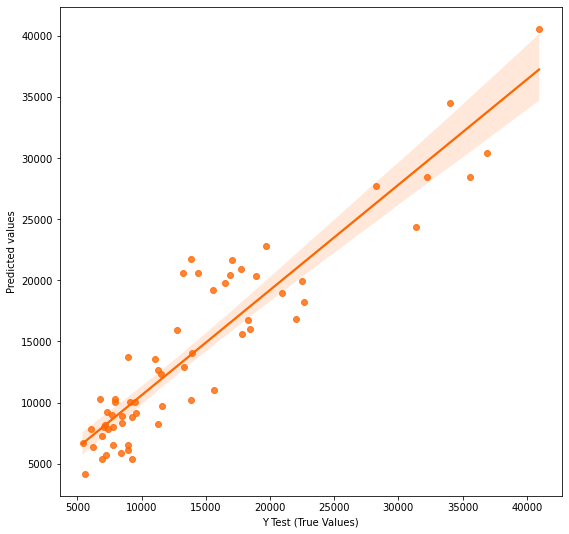

In [34]:
plt.figure(figsize=(9, 9))

sns.regplot(x=Y_test, y=pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')

plt.show()

## IV.2 XGBoost Regression

In [43]:
import xgboost as xg

# create an xgboost regression model
model = xg.XGBRegressor(n_estimators=1000,
                        max_depth=7,
                        eta=0.1,
                        subsample=0.7,
                        colsample_bytree=0.8)

model.fit(X_train, Y_train)
pred = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9315257873917138


## IV.3 Ridge Regression

In [44]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

R = Ridge(alpha=0.1)
R.fit(X_train, Y_train)
y_pred1 = R.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(Y_test, y_pred1)))
print("R2 score", r2_score(Y_test, y_pred1))

R2 score 0.8603062079434852
RMSE 3190.4679458296932


## IV.4 Lasso Regression

In [45]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train)
pred_test_lasso = model_lasso.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(Y_test, pred_test_lasso)))
print("R2 score", r2_score(Y_test, pred_test_lasso))

RMSE 3191.1670751075017
R2 score 0.8602449788559641


## IV.5 Elastic Regression

In [46]:
model_enet = ElasticNet(alpha=0.1)
model_enet.fit(X_train, Y_train)
pred_test_enet = model_enet.predict(X_test)

print("RMSE", np.sqrt(mean_squared_error(Y_test, pred_test_enet)))
print("R2 score", r2_score(Y_test, pred_test_enet))

RMSE 3168.7052116984596
R2 score 0.8622054592879703
